In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv('data/Phising_Training_Dataset.csv')

In [89]:
df.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [90]:
df.isnull().sum()

key                            0
having_IP                      0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8955 entries, 0 to 8954
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   key                          8955 non-null   int64
 1   having_IP                    8955 non-null   int64
 2   URL_Length                   8955 non-null   int64
 3   Shortining_Service           8955 non-null   int64
 4   having_At_Symbol             8955 non-null   int64
 5   double_slash_redirecting     8955 non-null   int64
 6   Prefix_Suffix                8955 non-null   int64
 7   having_Sub_Domain            8955 non-null   int64
 8   SSLfinal_State               8955 non-null   int64
 9   Domain_registeration_length  8955 non-null   int64
 10  Favicon                      8955 non-null   int64
 11  port                         8955 non-null   int64
 12  HTTPS_token                  8955 non-null   int64
 13  Request_URL                  8955 non-null   int

In [153]:
#checking the corelation of "result" with each feature

df.corr()['Result'] * 100

key                             -0.085372
having_IP                        9.402711
URL_Length                       5.933117
Shortining_Service              -6.617014
having_At_Symbol                 5.004532
double_slash_redirecting        -3.775843
Prefix_Suffix                   34.465968
having_Sub_Domain               29.672790
SSLfinal_State                  71.254339
Domain_registeration_length    -21.996014
Favicon                         -0.325980
port                             3.397094
HTTPS_token                     -3.657251
Request_URL                     25.457200
URL_of_Anchor                   69.639364
Links_in_tags                   23.880164
SFH                             21.793102
Submitting_to_email              1.198112
Abnormal_URL                    -5.985998
Redirect                        -2.719697
on_mouseover                     4.217951
RightClick                       0.488018
popUpWidnow                     -0.286792
Iframe                          -1

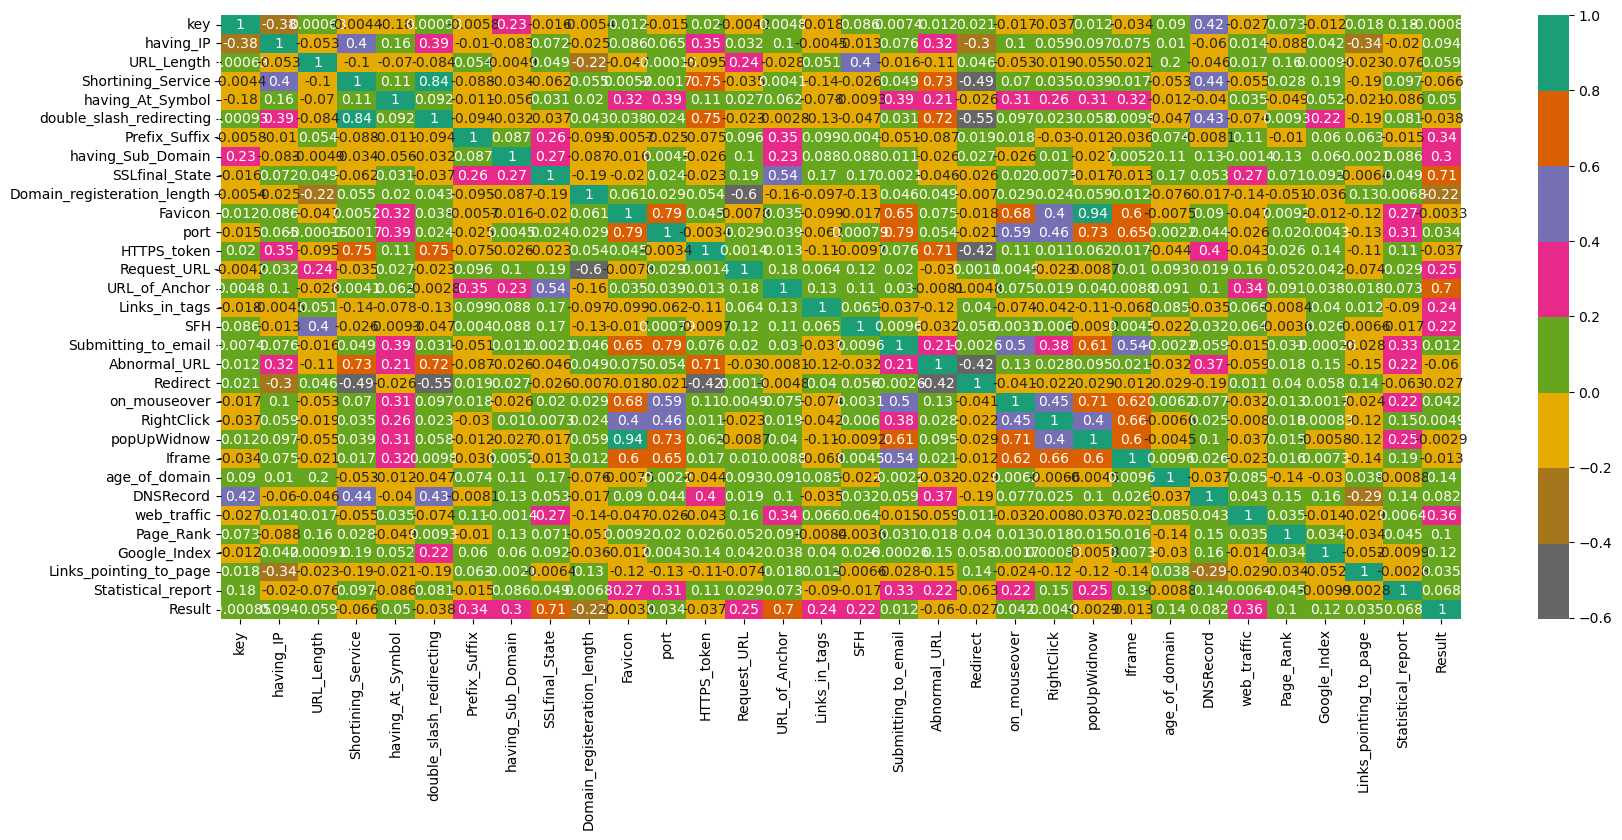

In [93]:
plt.figure(figsize=(20, 8), dpi=100)
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r')
plt.show()

In [94]:
features = ['key',
            'having_IP',                       
            'URL_Length',                       
            'Shortining_Service',             
            'having_At_Symbol',            
            'double_slash_redirecting',    
            'Prefix_Suffix',               
            'having_Sub_Domain',              
            'SSLfinal_State',                  
            'Domain_registeration_length',
            'Favicon',
            'port',                          
            'HTTPS_token',                   
            'Request_URL',                     
            'URL_of_Anchor',                   
            'Links_in_tags',                  
            'SFH',                            
            'Submitting_to_email',            
            'Abnormal_URL',                    
            'Redirect',                    
            'on_mouseover', 
            'RightClick', 
            'popUpWidnow',
            'Iframe',                          
            'age_of_domain',                
            'DNSRecord',                       
            'web_traffic',                   
            'Page_Rank',                      
            'Google_Index',                   
            'Links_pointing_to_page',          
            'Statistical_report']          

In [95]:
X = df[features]

In [96]:
y = df['Result']

In [97]:
X.shape

(8955, 31)

In [98]:
y.shape

(8955,)

In [99]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=98)

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
rfc = RandomForestClassifier()

In [103]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [104]:
pred = rfc.predict(X_test)

In [105]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix

In [106]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       0.97      0.95      0.96      1171
           1       0.96      0.97      0.97      1516

    accuracy                           0.96      2687
   macro avg       0.96      0.96      0.96      2687
weighted avg       0.96      0.96      0.96      2687



In [107]:
accuracy_score(y_test, pred)

0.9639002605135839

In [108]:
confusion_matrix(y_test, pred)

array([[1112,   59],
       [  38, 1478]], dtype=int64)

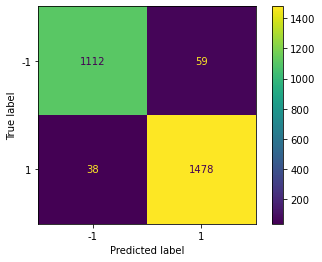

In [109]:
plot_confusion_matrix(estimator=rfc, X=X_test, y_true=y_test)

In [110]:
############ hyper parameter tuning ############

In [111]:
n_estimators = [100, 200, 300]
criterion = ['gini', 'entropy']
max_depth = [5, 10]
min_samples_split=[2,4,6]
min_samples_leaf=[1, 2, 3, 4]
max_features = ["auto", "sqrt", "log2"]
bootstrap=[True,False]
oob_score=[False,True]
n_jobs=[1,-1]

In [132]:
hyper_parameters = {'max_features': max_features, 'max_depth':max_depth, 'bootstrap': bootstrap, 'oob_score': oob_score, 'n_jobs': n_jobs}

In [133]:
grid = GridSearchCV(estimator=rfc, param_grid=hyper_parameters)

In [134]:
grid.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda

GridSearchCV(estimator=RandomForestClassifier(bootstrap=False,
                                              max_features='sqrt', n_jobs=1),
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_jobs': [1, -1], 'oob_score': [False, True]})

In [135]:
grid.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'n_jobs': -1,
 'oob_score': False}

In [136]:
rfc = RandomForestClassifier(bootstrap=False, max_features='sqrt', n_jobs=1, oob_score=False)

In [137]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_features='sqrt', n_jobs=1)

In [138]:
new_pred = rfc.predict(X_test)

In [139]:
#### check metrics ########

In [140]:
print(classification_report(y_test, new_pred))

              precision    recall  f1-score   support

          -1       0.96      0.95      0.96      1171
           1       0.96      0.97      0.97      1516

    accuracy                           0.96      2687
   macro avg       0.96      0.96      0.96      2687
weighted avg       0.96      0.96      0.96      2687



In [141]:
accuracy_score(y_test, new_pred)

0.9642724227763305

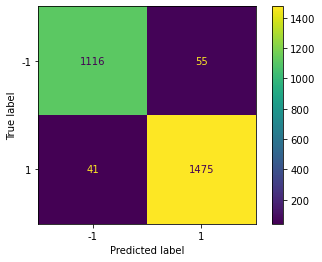

In [142]:
plot_confusion_matrix(rfc, X_test, y_test)

In [143]:
test_df = pd.read_csv('data/Phising_Testing_Dataset.csv')

In [144]:
test_df.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,21338,1,1,1,1,1,1,-1,1,-1,...,1,1,1,1,1,1,1,-1,0,1
1,21339,1,-1,1,1,1,-1,0,-1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
2,21340,1,-1,1,1,1,-1,0,0,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1
3,21341,-1,-1,-1,1,-1,-1,-1,-1,1,...,1,-1,-1,1,-1,1,-1,1,1,-1
4,21342,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,0,1


In [145]:
test_pred = rfc.predict(test_df)

In [146]:
k = pd.DataFrame(data=test_df['key'], columns=['key'])

In [147]:
r = pd.DataFrame(test_pred, columns=['Result'])

In [148]:
final_df = pd.concat([k, r], axis=1)

In [149]:
final_df

,key,Result
0,21338,1
1,21339,-1
2,21340,-1
3,21341,-1
4,21342,1
...,...,...
2095,23433,1
2096,23434,1
2097,23435,-1
2098,23436,1


In [150]:
result = final_df.to_csv('Result-1', index=True)

In [151]:
result